<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 1. Breathalizer Test

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  """prob_positive = probability of false positive (assume it works well for truely drunk individuals)
  
  prob_drunk_prior = before any testing begins, we assume 1/1000 drivers pulled over are drunk
  results of this test would become the new 'prob_drunk_prior' for further tests
  
  prob_positive_drunk = probability of positive given drunk, this is a constant and inherent in the test"""
  return prob_positive_drunk*prob_drunk_prior/(prob_positive_drunk*prob_drunk_prior + (prob_positive)*(1-prob_drunk_prior)) 

In [0]:
results = [.001] # list of probabilities that a person is drunk. Start with base assumption 1/1000
outcome = prob_drunk_given_positive(.001,.08,1)
#outcome
for _ in range(7):
  results.append(outcome)
  outcome = prob_drunk_given_positive(outcome,.08,1)

## 3. Visualization frequentist vs Bayes approach (going out of order, to lump together relevant sections)

In [0]:
# With frequentist aproach, 8% false positive must mean 92% true positive
freq_results = [0]

for i in range(1,8):
  outcome = 1-.08**i # subtract each iteration of potentially false positives
  freq_results.append(outcome)

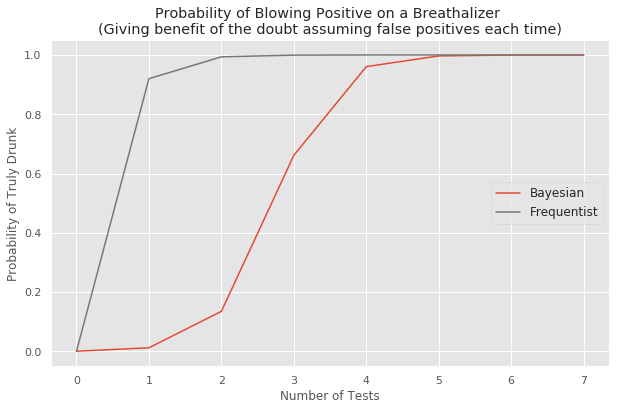

In [108]:
sb.set(rc={'figure.figsize':(10,6)})

plt.style.use('ggplot')
ax = sb.lineplot(x = range(len(results)),y=results)
ax = sb.lineplot(x = range(len(freq_results)),y=freq_results,color = 'C3')
plt.title('Probability of Blowing Positive on a Breathalizer \n(Giving benefit of the doubt assuming false positives each time)')
plt.xlabel('Number of Tests')
plt.ylabel('Probability of Truly Drunk')
plt.legend(['Bayesian','Frequentist'],loc='center right',fontsize=12);

## 2. bayes_mvs vs frequentist approach

In [0]:
# From yesterday's assignment:

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                          names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'n':0,'y':1,'?':np.nan})

dem = df[df.party=='democrat']
rep = df[df.party=='republican']

def confidence_interval(data,confidence=.95):
  data = data.dropna()
  #data = np.array(data)
  n = len(data)
  t = stats.t.ppf((1+confidence)/2,n-1)
  stderr = data.std()/np.sqrt(n) # using pandas because std assumes sample std by default
  margin_of_error = t*stderr
  mean = data.mean()
  print('Margin of Error:',margin_of_error)
  return mean, mean - margin_of_error, mean + margin_of_error


In [77]:
#Frequentist approach
confidence_interval(dem['handicapped-infants'])

Margin of Error: 0.06005846304814615


(0.6046511627906976, 0.5445926997425515, 0.6647096258388437)

In [80]:
mean, variance, stdev = stats.bayes_mvs(dem['handicapped-infants'].dropna(),alpha=.95)
mean

Mean(statistic=0.6046511627906976, minmax=(0.5445926997425515, 0.6647096258388437))

## 4. Bayes vs frequentist in words
Bayesian statistics assumes a prior probability which updates as more information is gathered. While frequentist statistics would maintian the same probability throughout.

For low sample rates, these may be dramatically different, however just as with the law of large numbers, they converge with more. For the Bayesian method, the 'True probability' comes about with updates and for the Frequentist method, provided a large sample pool already exists, this 'True probability' is good enough

# Stretch - Applying Bayes Theorem to the Monty Hall Problem

Shorthand definitions:

$P(i), P(j), P(k) = \text{probability that the prize is behind door i,j and k respectively -- always 1/3}$

$P(Hi),P(Hj),P(Hk) = \text{probability that host reveals door i, j and k respectively -- scenario dependent} $

### Setup:
The doors don't matter and can be substituted. We are looking at a specific instance where a contestant chooses door i and the host reveals a goat behind door j. We will explore what this tells us about the likelihood of winning our prize if we stay with i or switch to the unrevealed k. We will simply expand Bayes' theorem and see the results of either staying with i given the prize is in i or in k.

### scenario 1: Staying with our original choice (i) and winning (prize is in i)
#### (prize is in i, therefore P(Hj | i) is 1/2 because host is free to choose to show either j or k)

$P(i|Hj)=\frac{P(i \cap Hj)}{P(Hj)}=\frac{P(Hj|i)P(i)}{P(Hj|i)P(i)+P(Hj|j)P(j)+P(Hj|k)P(k)} = 
\frac{(1/2)(1/3)}{(1/2)(1/3)+(0)(1/3)+(1)(1/3)} = \frac{1/6}{1/6 + 1/3} = 1/3$ 


### scenario 2: Staying with our original choice (i) and losing (prize is in k)
#### (prize is in i, therefore P(Hj | k) is 1 because host is constrained to not reveal the prize in k) 

$ P(k|Hj) = \frac{P(k \cap Hj)}{P(Hj)} = \frac{P(Hj|k)P(k)}{P(Hj|i)P(i)+P(Hj|j)P(j)+P(Hj|k)P(k)}=
\frac{(1)(1/3)}{(1/2)(1/3) + (0)(1/3) + (1)(1/3)} = \frac{1/3}{1/6 + 1/3} = 2/3$

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)